In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [22]:
train_label = train['label']
train_data= train.drop(['label'],axis=1)

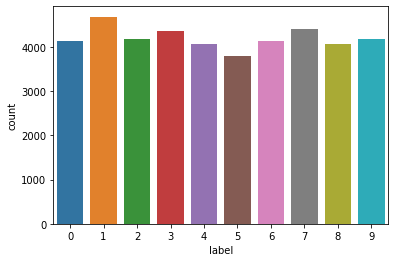

In [23]:
sns.countplot(train_label)

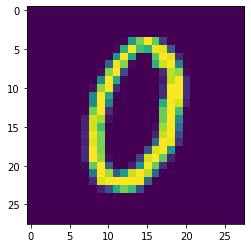

In [47]:
plt.imshow(train_data[5][:,:,0])

### Null values

In [25]:
train_data.columns[train_data.isnull().any()]


Index([], dtype='object')

In [24]:
train_label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [21]:
test.columns[test.isnull().any()]


Index([], dtype='object')

## Converting to float32
https://github.com/ageron/handson-ml/issues/265


In [29]:
train_data = train_data.astype('float32')
test = test.astype('float32')

## Normalization

https://stats.stackexchange.com/questions/253172/how-should-i-normalise-the-inputs-to-a-neural-network

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6



We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].


In [30]:
train_data = train_data / 255.0
test = test / 255.0


## Reshape 

https://datascience.stackexchange.com/questions/11704/reshaping-of-data-for-deep-learning-using-keras

https://keras.io/examples/mnist_cnn/

In [32]:
train_data.shape

(42000, 784)

In [35]:
test.shape

(28000, 784)

In [26]:
import keras.backend as K

Using TensorFlow backend.


In [27]:
K.image_data_format()

'channels_last'

In [33]:
train_data = train_data.values.reshape(-1,28,28,1)

In [34]:
train_data.shape

(42000, 28, 28, 1)

In [36]:
test = test.values.reshape(-1,28,28,1)

## Categorical data

In [38]:
train_label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [37]:
from keras.utils.np_utils import to_categorical

In [39]:
y_train_cat = to_categorical(train_label)


In [55]:
y_train_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## train test split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(train_data,y_train_cat,test_size=0.1)

In [50]:
X_train.shape

(37800, 28, 28, 1)

## Model

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [60]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [63]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 37800 samples, validate on 4200 samples
Epoch 1/1
37800/37800 [==============================] - 90s 2ms/step - loss: 0.2171 - accuracy: 0.9350 - val_loss: 0.1253 - val_accuracy: 0.9586
Test loss: 0.1253048474827249
Test accuracy: 0.9585714340209961


## Adding more layers

The number of filters is increased to increase the depth of the feature space thus helping in learning more levels of global abstract structures. 

By convention the number of channels generally increase or stay the same while we progress through layers in our convolutional neural net architecture

In [69]:
K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [70]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [71]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 37800 samples, validate on 4200 samples
Epoch 1/1
37800/37800 [==============================] - 102s 3ms/step - loss: 0.2175 - accuracy: 0.9308 - val_loss: 0.0743 - val_accuracy: 0.9771
Test loss: 0.07429131812917018
Test accuracy: 0.977142870426178


## Dropout

In [79]:
from keras.layers import Dropout

In [75]:
K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25)) 

model.add(Dense(10,activation='softmax'))


In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [87]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 102s 3ms/step - loss: 0.0783 - accuracy: 0.9754 - val_loss: 0.0719 - val_accuracy: 0.9783
Epoch 2/10
37800/37800 [==============================] - 101s 3ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 0.0716 - val_accuracy: 0.9800
Epoch 3/10
37800/37800 [==============================] - 101s 3ms/step - loss: 0.0445 - accuracy: 0.9855 - val_loss: 0.0670 - val_accuracy: 0.9817
Epoch 4/10
37800/37800 [==============================] - 102s 3ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 5/10
37800/37800 [==============================] - 102s 3ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0425 - val_accuracy: 0.9888
Epoch 6/10
37800/37800 [==============================] - 102s 3ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0364 - val_accuracy: 0.9886
Epoch 7/10
 2304/37800 [>.............................] - ETA: 

KeyboardInterrupt: 

In [88]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12590197773073755
Test accuracy: 0.9611904621124268


In [92]:
model_vals = pd.DataFrame(model.history.history)

In [93]:
model_vals

,val_loss,val_accuracy,loss,accuracy
0,0.071858,0.978333,0.078252,0.975423
1,0.071576,0.980000,0.056329,0.982646
2,0.066982,0.981667,0.044502,0.985503
3,0.038664,0.989286,0.036789,0.988413
4,0.042540,0.988810,0.032678,0.990000
5,0.036419,0.988571,0.028911,0.991032


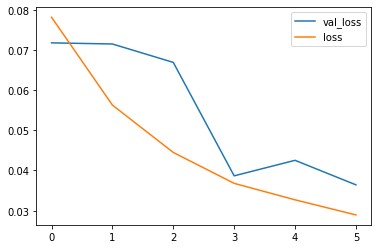

In [97]:
plt.plot(model_vals['val_loss'],label='val_loss')
plt.plot(model_vals['loss'],label='loss')
plt.legend()

## Early stopping

In [78]:
from keras.callbacks import EarlyStopping

In [98]:
K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25)) 

model.add(Dense(10,activation='softmax'))


In [99]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [100]:
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose=1,patience=25)

In [101]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stop])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 103s 3ms/step - loss: 0.3011 - accuracy: 0.9016 - val_loss: 0.0929 - val_accuracy: 0.9702
Epoch 2/10
37800/37800 [==============================] - 99s 3ms/step - loss: 0.0833 - accuracy: 0.9730 - val_loss: 0.0629 - val_accuracy: 0.9821
Epoch 3/10
37800/37800 [==============================] - 101s 3ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0534 - val_accuracy: 0.9833
Epoch 4/10
37800/37800 [==============================] - 100s 3ms/step - loss: 0.0465 - accuracy: 0.9858 - val_loss: 0.0426 - val_accuracy: 0.9864
Epoch 5/10
37800/37800 [==============================] - 100s 3ms/step - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0396 - val_accuracy: 0.9879
Epoch 6/10
37800/37800 [==============================] - 105s 3ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0457 - val_accuracy: 0.9874
Epoch 7/10
37800/37800 [==============================] - 98s 3m

In [102]:
model_vals = pd.DataFrame(model.history.history)

In [103]:
model_vals


,val_loss,val_accuracy,loss,accuracy
0,0.092896,0.970238,0.301073,0.901640
1,0.062881,0.982143,0.083280,0.972963
2,0.053357,0.983333,0.059112,0.981931
3,0.042552,0.986429,0.046545,0.985847
4,0.039605,0.987857,0.038096,0.987936
5,0.045678,0.987381,0.033059,0.990026
6,0.037793,0.989524,0.031353,0.989841
7,0.040629,0.989286,0.027054,0.991217
8,0.041770,0.988571,0.025241,0.991984
9,0.044222,0.988095,0.021824,0.993280


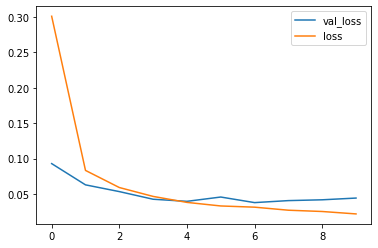

In [105]:
plt.plot(model_vals['val_loss'],label='val_loss')
plt.plot(model_vals['loss'],label='loss')
plt.legend()

## Batch normalization

In [107]:
from keras.layers import BatchNormalization



In [108]:
K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Dense(10,activation='softmax'))


In [109]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [110]:
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose=1,patience=25)

In [111]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stop])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 136s 4ms/step - loss: 0.1601 - accuracy: 0.9512 - val_loss: 4.7445 - val_accuracy: 0.1064
Epoch 2/10
37800/37800 [==============================] - 137s 4ms/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 0.0602 - val_accuracy: 0.9826
Epoch 3/10
37800/37800 [==============================] - 128s 3ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0735 - val_accuracy: 0.9790
Epoch 4/10
37800/37800 [==============================] - 126s 3ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 5/10
37800/37800 [==============================] - 122s 3ms/step - loss: 0.0278 - accuracy: 0.9915 - val_loss: 0.0325 - val_accuracy: 0.9905
Epoch 6/10
37800/37800 [==============================] - 113s 3ms/step - loss: 0.0229 - accuracy: 0.9924 - val_loss: 0.0344 - val_accuracy: 0.9900
Epoch 7/10
37800/37800 [==============================] - 115s 

In [112]:
model_vals = pd.DataFrame(model.history.history)

In [113]:
model_vals

,val_loss,val_accuracy,loss,accuracy
0,4.744463,0.106429,0.160101,0.951243
1,0.060156,0.982619,0.054130,0.982593
2,0.073523,0.979048,0.039086,0.987725
3,0.040690,0.986667,0.032871,0.989392
4,0.032545,0.990476,0.027788,0.991455
5,0.034412,0.990000,0.022914,0.992381
6,0.034733,0.989524,0.021322,0.993360
7,0.044274,0.987857,0.017491,0.994497
8,0.035307,0.989762,0.017945,0.994180
9,0.039297,0.988333,0.015306,0.995106


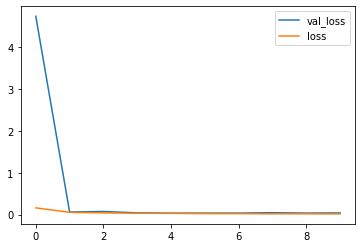

In [114]:
plt.plot(model_vals['val_loss'],label='val_loss')
plt.plot(model_vals['loss'],label='loss')
plt.legend()

## Additional trials

## Data augmentation

In [115]:
from keras.preprocessing.image import ImageDataGenerator


In [117]:
generator = ImageDataGenerator(rescale = 1./255,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rotation_range = 20,
                               shear_range = 0.3,
                               zoom_range = 0.3,
                               horizontal_flip = True,
                               featurewise_center=False,
                              samplewise_center=False,
                              featurewise_std_normalization=False, 
                              )

In [118]:
generator.fit(X_train)

In [131]:
K.clear_session()
history = model.fit_generator(generator.flow(X_train,y_train, 
                                           batch_size=128),
                              epochs = 10,
                              validation_data = (X_test, y_test),
                              
                              verbose = 1, 
                        
                              callbacks=[early_stop])


Epoch 1/10
296/296 [==============================] - 141s 477ms/step - loss: 0.1517 - accuracy: 0.9533 - val_loss: 2829.1447 - val_accuracy: 0.2138
Epoch 2/10
296/296 [==============================] - 139s 470ms/step - loss: 0.1458 - accuracy: 0.9553 - val_loss: 1986.5606 - val_accuracy: 0.3921
Epoch 3/10
296/296 [==============================] - 136s 458ms/step - loss: 0.1419 - accuracy: 0.9564 - val_loss: 3173.7898 - val_accuracy: 0.1726
Epoch 4/10
296/296 [==============================] - 131s 444ms/step - loss: 0.1469 - accuracy: 0.9554 - val_loss: 2275.6078 - val_accuracy: 0.3079
Epoch 5/10
296/296 [==============================] - 125s 423ms/step - loss: 0.1490 - accuracy: 0.9538 - val_loss: 2584.9274 - val_accuracy: 0.2217
Epoch 6/10
296/296 [==============================] - 124s 420ms/step - loss: 0.1373 - accuracy: 0.9581 - val_loss: 2821.5345 - val_accuracy: 0.2140
Epoch 7/10
296/296 [==============================] - 125s 422ms/step - loss: 0.1407 - accuracy: 0.9574 - 

In [129]:
history.history

{'val_loss': [2747.0651027715776,
  2787.9225818452383,
  2838.2925590587797,
  2269.3243819754466,
  2402.3691541108633,
  2312.869169456845,
  1580.3246684337798,
  1107.374863048735,
  2395.145232979911,
  1633.3215601748511],
 'val_accuracy': [0.3811904788017273,
  0.3326190412044525,
  0.32976189255714417,
  0.4164285659790039,
  0.45595237612724304,
  0.3707142770290375,
  0.494523823261261,
  0.5780952572822571,
  0.3166666626930237,
  0.3692857027053833],
 'loss': [0.18320627396699612,
  0.17778166007585627,
  0.17123464037501623,
  0.16838913325594845,
  0.16608789150046294,
  0.1615242945785245,
  0.17526898708608415,
  0.1666580489924345,
  0.16512152694520496,
  0.16067624387286958],
 'accuracy': [0.9428042,
  0.9448942,
  0.94756615,
  0.94722223,
  0.9499735,
  0.9506349,
  0.946164,
  0.94896823,
  0.9487037,
  0.95066136]}

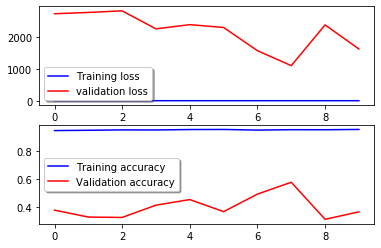

In [130]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

https://keras.io/examples/mnist_cnn/
    
https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
    
    
    